/var/folders/jf/m7m4d3dj54zgrgl_hgdy76g00000gn/T/ipykernel_97742/4041611699.py:40: RuntimeWarning: overflow encountered in exp
  fR = 1/(1 + np.exp(beta*(eps - mu_R)))


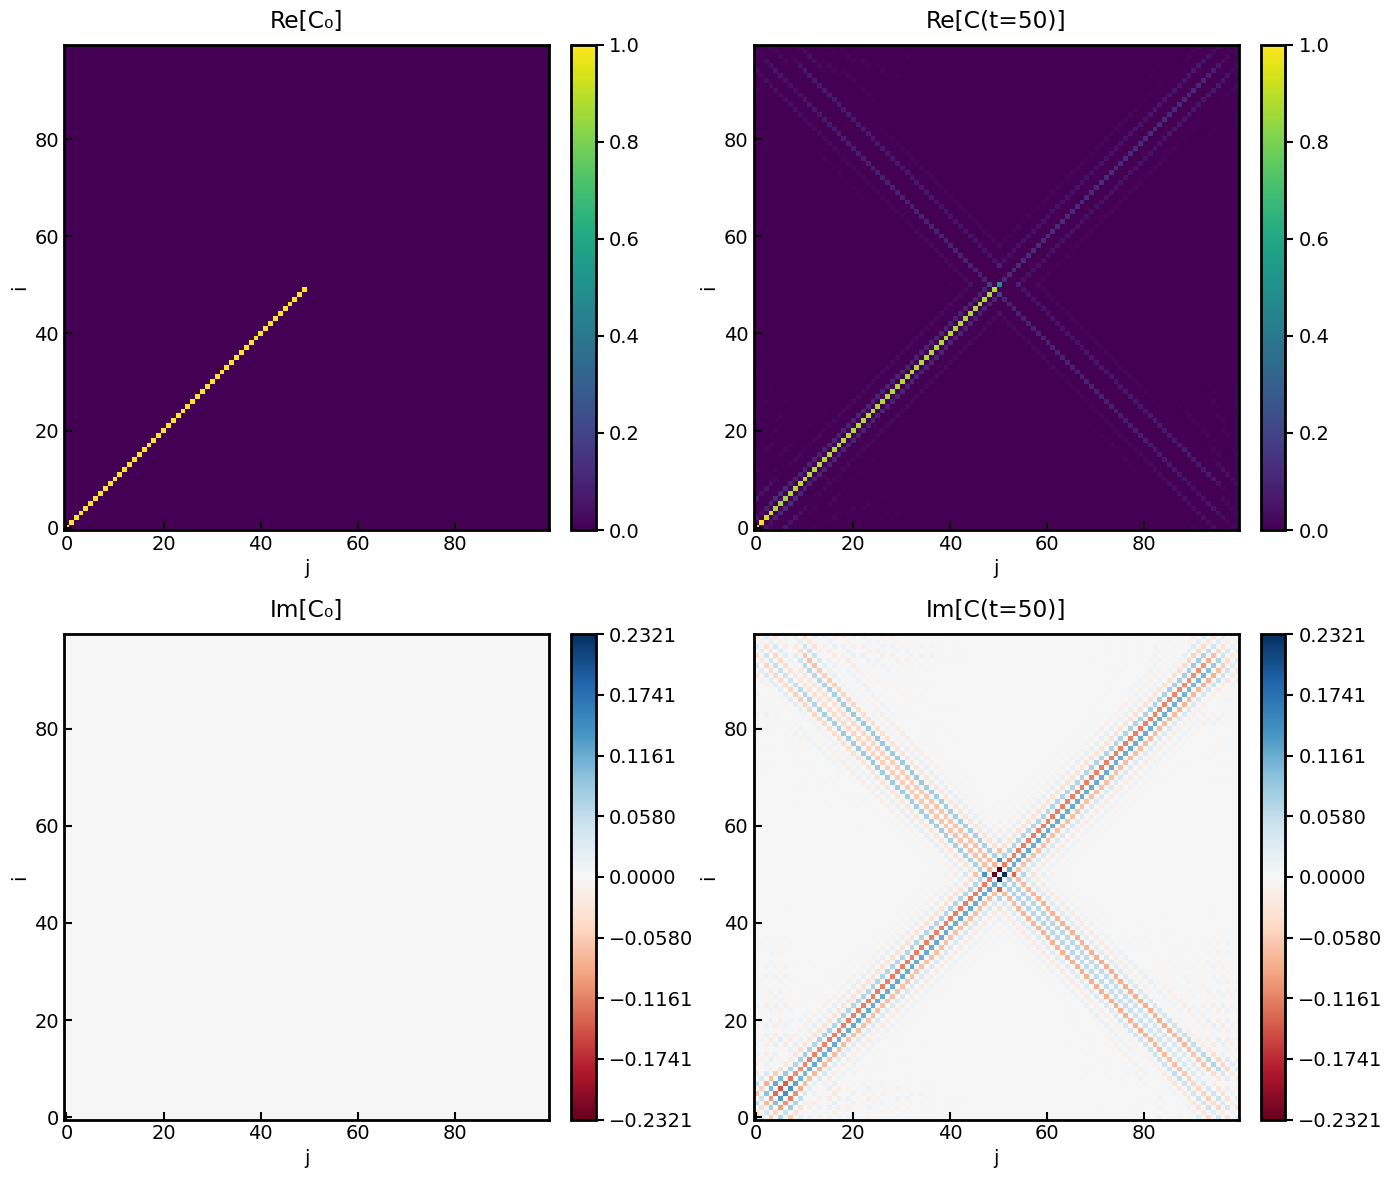

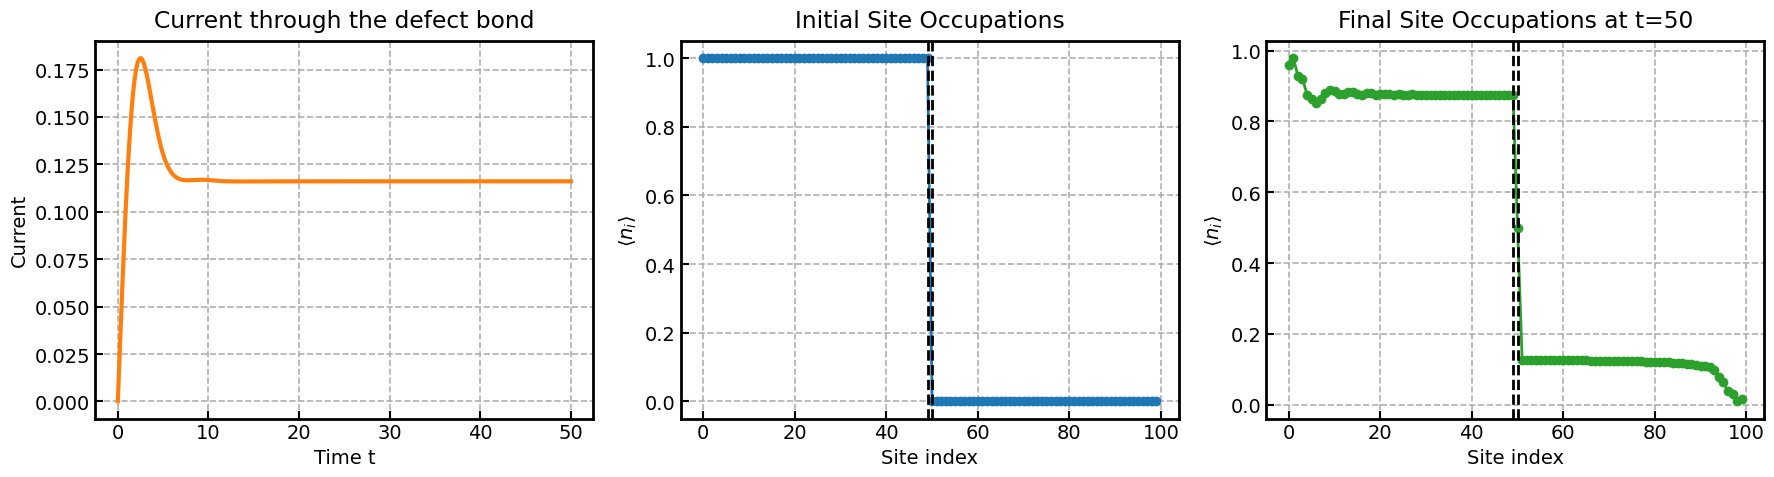

In [2]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Aesthetic settings
plt.rcParams.update({
    'font.size': 14,
    'axes.linewidth': 2,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'xtick.major.size': 6,
    'ytick.major.size': 6,
    'legend.fontsize': 12
})

# Model parameters
L, J, J_imp = 100, 1.0, 0.5
mu_L, mu_R = 1.0, -1.0
t_steady = 50.0
j0 = L//2 - 1

# 1) Build & diagonalize hopping Hamiltonian
def build_hopping_matrix(L, J, J_imp):
    center = L // 2
    h = np.zeros((L, L))
    for j in range(L - 1):
        if j == center - 1 or j == center:
            bond = J_imp
        else:
            bond = J
        h[j, j + 1] = h[j + 1, j] = bond / 2
    return h

h = build_hopping_matrix(L, J, J_imp)
eps, phi = la.eigh(h)

# 2) Initial correlation matrix
def initial_correlation_matrix(phi, eps, mu_L, mu_R, beta=1e6):
    fL = 1/(1 + np.exp(beta*(eps - mu_L)))
    fR = 1/(1 + np.exp(beta*(eps - mu_R)))
    CL = phi @ np.diag(fL) @ phi.conj().T
    CR = phi @ np.diag(fR) @ phi.conj().T
    C0 = np.zeros_like(CL, dtype=complex)
    C0[:j0+1, :j0+1] = CL[:j0+1, :j0+1]
    C0[j0+1:, j0+1:] = CR[j0+1:, j0+1:]
    return C0

C0 = initial_correlation_matrix(phi, eps, mu_L, mu_R)

# 3) Steady‐state correlation
U_steady = phi @ np.diag(np.exp(-1j*eps*t_steady)) @ phi.conj().T
C_steady = U_steady @ C0 @ U_steady.conj().T

# --- Block 1: 2×2 Re/Im panels ---
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Real parts
for ax, C, title in zip(axes[0], [C0, C_steady], ['Re[C₀]', f'Re[C(t={t_steady:.0f})]']):
    im = ax.imshow(np.real(C), origin='lower', vmin=0, vmax=1,
                   cmap='viridis', interpolation='nearest')
    ax.set_title(title, pad=12)
    ax.set_xlabel('j'); ax.set_ylabel('i')
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, ticks=np.linspace(0,1,6))

# Imaginary parts
max_im = max(np.abs(np.imag(C0)).max(), np.abs(np.imag(C_steady)).max())
for ax, C, title in zip(axes[1], [C0, C_steady], ['Im[C₀]', f'Im[C(t={t_steady:.0f})]']):
    im = ax.imshow(np.imag(C), origin='lower', cmap='RdBu',
                   vmin=-max_im, vmax=max_im, interpolation='nearest')
    ax.set_title(title, pad=12)
    ax.set_xlabel('j'); ax.set_ylabel('i')
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, ticks=np.linspace(-max_im, max_im, 9))

for ax in axes.flatten():
    ax.tick_params(direction='in', length=6, width=1.5)

plt.tight_layout()
plt.show()


# --- Block 2: current + occupations ---
# (a) current through defect bond; (b) initial <n_i>; (c) final <n_i>
times = np.linspace(0, t_steady, 300)
currents = []
for t in times:
    U_t = phi @ np.diag(np.exp(-1j*eps*t)) @ phi.conj().T
    Ct = U_t @ C0 @ U_t.conj().T
    currents.append(J_imp * np.imag(Ct[j0, j0+1]))

n_init  = np.real(np.diag(C0))
n_final = np.real(np.diag(C_steady))

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# current
axes[0].plot(times, currents, '-', lw=3, color='tab:orange')
axes[0].set_title('Current through the defect bond', pad=10)
axes[0].set_xlabel('Time t'); axes[0].set_ylabel('Current')
axes[0].grid(True, linestyle='--', linewidth=1.2)

# initial occupations
axes[1].plot(range(L), n_init, 'o-', lw=2, markersize=6, color='tab:blue')
axes[1].set_title('Initial Site Occupations', pad=10)
axes[1].set_xlabel('Site index'); axes[1].set_ylabel(r'$\langle n_i\rangle$')
axes[1].axvline(j0,   color='k', linestyle='--', lw=2)
axes[1].axvline(j0+1, color='k', linestyle='--', lw=2)
axes[1].grid(True, linestyle='--', linewidth=1.2)

# final occupations
axes[2].plot(range(L), n_final, 'o-', lw=2, markersize=6, color='tab:green')
axes[2].set_title(f'Final Site Occupations at t={t_steady:.0f}', pad=10)
axes[2].set_xlabel('Site index'); axes[2].set_ylabel(r'$\langle n_i\rangle$')
axes[2].axvline(j0,   color='k', linestyle='--', lw=2)
axes[2].axvline(j0+1, color='k', linestyle='--', lw=2)
axes[2].grid(True, linestyle='--', linewidth=1.2)

for ax in axes:
    ax.tick_params(direction='in', length=6, width=1.5)

plt.tight_layout()
plt.show()

/var/folders/jf/m7m4d3dj54zgrgl_hgdy76g00000gn/T/ipykernel_97742/2348240301.py:40: RuntimeWarning: overflow encountered in exp
  fR = 1/(1 + np.exp(beta*(eps - mu_R)))


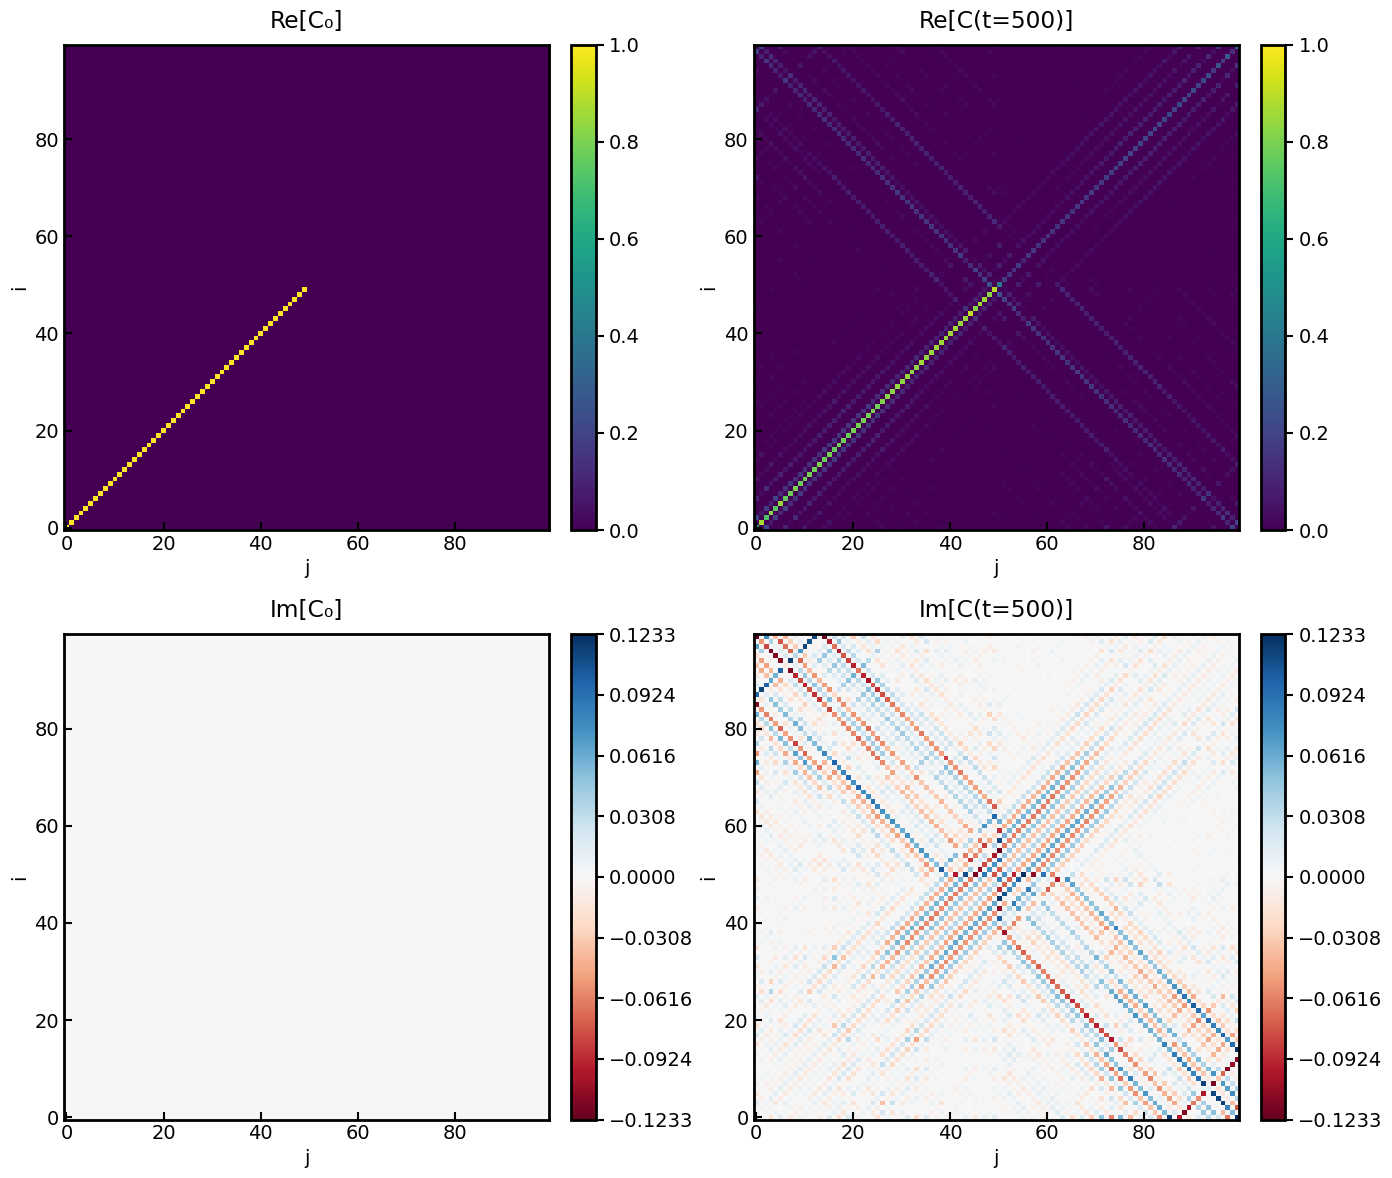

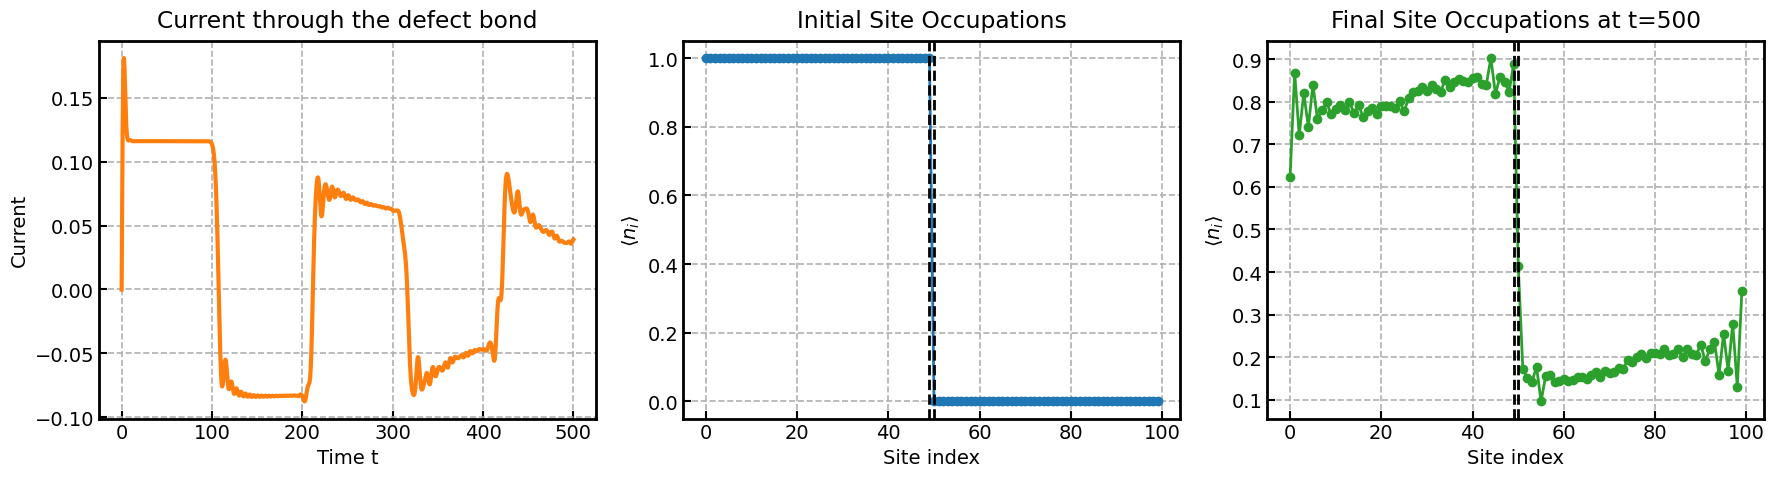

In [5]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Aesthetic settings
plt.rcParams.update({
    'font.size': 14,
    'axes.linewidth': 2,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'xtick.major.size': 6,
    'ytick.major.size': 6,
    'legend.fontsize': 12
})

# Model parameters
L, J, J_imp = 100, 1.0, 0.5
mu_L, mu_R = 1.0, -1.0
t_steady = 500.0
j0 = L//2 - 1

# 1) Build & diagonalize hopping Hamiltonian
def build_hopping_matrix(L, J, J_imp):
    center = L // 2
    h = np.zeros((L, L))
    for j in range(L - 1):
        if j == center - 1 or j == center:
            bond = J_imp
        else:
            bond = J
        h[j, j + 1] = h[j + 1, j] = bond / 2
    return h

h = build_hopping_matrix(L, J, J_imp)
eps, phi = la.eigh(h)

# 2) Initial correlation matrix
def initial_correlation_matrix(phi, eps, mu_L, mu_R, beta=1e6):
    fL = 1/(1 + np.exp(beta*(eps - mu_L)))
    fR = 1/(1 + np.exp(beta*(eps - mu_R)))
    CL = phi @ np.diag(fL) @ phi.conj().T
    CR = phi @ np.diag(fR) @ phi.conj().T
    C0 = np.zeros_like(CL, dtype=complex)
    C0[:j0+1, :j0+1] = CL[:j0+1, :j0+1]
    C0[j0+1:, j0+1:] = CR[j0+1:, j0+1:]
    return C0

C0 = initial_correlation_matrix(phi, eps, mu_L, mu_R)

# 3) Steady‐state correlation
U_steady = phi @ np.diag(np.exp(-1j*eps*t_steady)) @ phi.conj().T
C_steady = U_steady @ C0 @ U_steady.conj().T

# --- Block 1: 2×2 Re/Im panels ---
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Real parts
for ax, C, title in zip(axes[0], [C0, C_steady], ['Re[C₀]', f'Re[C(t={t_steady:.0f})]']):
    im = ax.imshow(np.real(C), origin='lower', vmin=0, vmax=1,
                   cmap='viridis', interpolation='nearest')
    ax.set_title(title, pad=12)
    ax.set_xlabel('j'); ax.set_ylabel('i')
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, ticks=np.linspace(0,1,6))

# Imaginary parts
max_im = max(np.abs(np.imag(C0)).max(), np.abs(np.imag(C_steady)).max())
for ax, C, title in zip(axes[1], [C0, C_steady], ['Im[C₀]', f'Im[C(t={t_steady:.0f})]']):
    im = ax.imshow(np.imag(C), origin='lower', cmap='RdBu',
                   vmin=-max_im, vmax=max_im, interpolation='nearest')
    ax.set_title(title, pad=12)
    ax.set_xlabel('j'); ax.set_ylabel('i')
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, ticks=np.linspace(-max_im, max_im, 9))

for ax in axes.flatten():
    ax.tick_params(direction='in', length=6, width=1.5)

plt.tight_layout()
plt.show()


# --- Block 2: current + occupations ---
# (a) current through defect bond; (b) initial <n_i>; (c) final <n_i>
times = np.linspace(0, t_steady, 5000)
currents = []
for t in times:
    U_t = phi @ np.diag(np.exp(-1j*eps*t)) @ phi.conj().T
    Ct = U_t @ C0 @ U_t.conj().T
    currents.append(J_imp * np.imag(Ct[j0, j0+1]))

n_init  = np.real(np.diag(C0))
n_final = np.real(np.diag(C_steady))

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# current
axes[0].plot(times, currents, '-', lw=3, color='tab:orange')
axes[0].set_title('Current through the defect bond', pad=10)
axes[0].set_xlabel('Time t'); axes[0].set_ylabel('Current')
axes[0].grid(True, linestyle='--', linewidth=1.2)

# initial occupations
axes[1].plot(range(L), n_init, 'o-', lw=2, markersize=6, color='tab:blue')
axes[1].set_title('Initial Site Occupations', pad=10)
axes[1].set_xlabel('Site index'); axes[1].set_ylabel(r'$\langle n_i\rangle$')
axes[1].axvline(j0,   color='k', linestyle='--', lw=2)
axes[1].axvline(j0+1, color='k', linestyle='--', lw=2)
axes[1].grid(True, linestyle='--', linewidth=1.2)

# final occupations
axes[2].plot(range(L), n_final, 'o-', lw=2, markersize=6, color='tab:green')
axes[2].set_title(f'Final Site Occupations at t={t_steady:.0f}', pad=10)
axes[2].set_xlabel('Site index'); axes[2].set_ylabel(r'$\langle n_i\rangle$')
axes[2].axvline(j0,   color='k', linestyle='--', lw=2)
axes[2].axvline(j0+1, color='k', linestyle='--', lw=2)
axes[2].grid(True, linestyle='--', linewidth=1.2)

for ax in axes:
    ax.tick_params(direction='in', length=6, width=1.5)

plt.tight_layout()
plt.show()

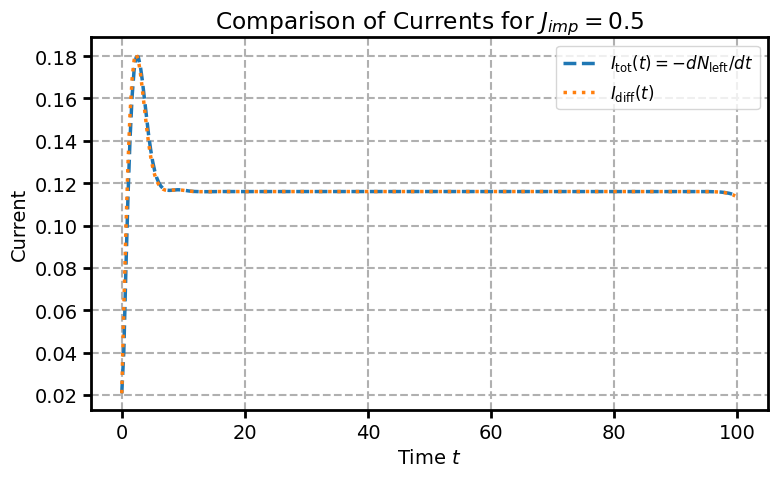

In [9]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Aesthetic settings
plt.rcParams.update({
    'font.size': 14,
    'axes.linewidth': 2,
    'xtick.major.width': 2,
    'ytick.major.width': 2,
    'xtick.major.size': 6,
    'ytick.major.size': 6,
    'grid.linewidth': 1.5,
    'legend.fontsize': 12
})

# Model parameters
L = 100
J = 1.0
J_imp = 0.5
mu_L, mu_R = 1.0, -1.0
t_final = 100.0
j0 = L//2 - 1

# Build & diagonalize hopping Hamiltonian
def build_hopping_matrix(L, J, J_imp):
    center = L//2
    h = np.zeros((L, L))
    for j in range(L-1):
        bond = J_imp if (j == center-1 or j == center) else J
        h[j, j+1] = h[j+1, j] = bond/2
    return h

h = build_hopping_matrix(L, J, J_imp)
eps, phi = la.eigh(h)

# Initial correlation matrix
def initial_correlation_matrix(phi, eps, mu_L, mu_R):
    fL = (eps < mu_L).astype(float)
    fR = (eps < mu_R).astype(float)
    CL = phi @ np.diag(fL) @ phi.conj().T
    CR = phi @ np.diag(fR) @ phi.conj().T
    C0 = np.zeros_like(CL, dtype=complex)
    C0[:j0+1, :j0+1] = CL[:j0+1, :j0+1]
    C0[j0+1:, j0+1:] = CR[j0+1:, j0+1:]
    return C0

C0 = initial_correlation_matrix(phi, eps, mu_L, mu_R)

# Time grid
times = np.linspace(0, t_final, 300)

# Compute N_left and currents
N_left = []
I_bond = []
for t in times:
    U_t = phi @ np.diag(np.exp(-1j*eps*t)) @ phi.conj().T
    Ct = U_t @ C0 @ U_t.conj().T
    N_left.append(np.real(np.trace(Ct[:j0+1, :j0+1])))
    I_bond.append(J_imp * np.imag(Ct[j0, j0+1]))

# Compute alternate current as -dN_left/dt
I_alt = -np.gradient(N_left, times)
I_diff = np.diff(N_left) / np.diff(times)

# Plot comparison
plt.figure(figsize=(8,5))
#plt.plot(times, I_bond,   '-', lw=2.5, label=r'$I_{\rm bond}(t)$')
plt.plot(times, I_alt,    '--', lw=2.5, label=r'$I_{\rm tot}(t)=-dN_{\rm left}/dt$')
plt.plot(times[:-1], -I_diff, ':', lw=2.5, label=r'$I_{\rm diff}(t)$')
plt.title(f'Comparison of Currents for $J_{{imp}}={J_imp}$')
plt.xlabel('Time $t$')
plt.ylabel(r'Current')
plt.grid(True, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
I_alt[-1]

np.float64(0.1139675378005971)

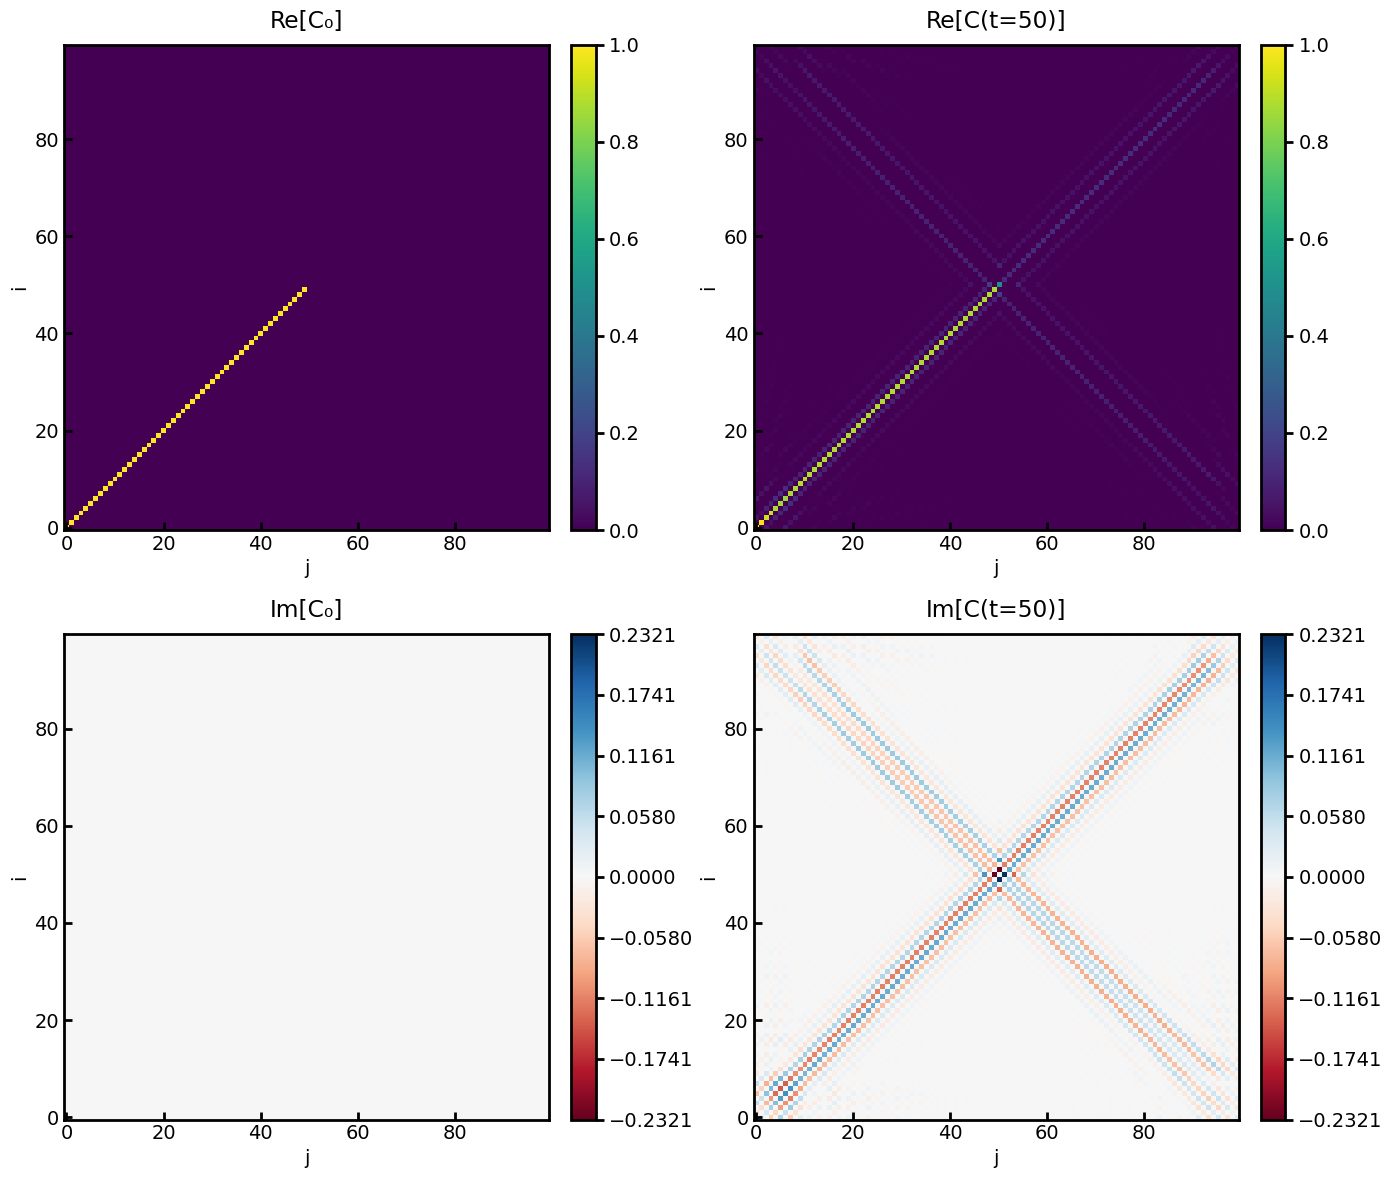

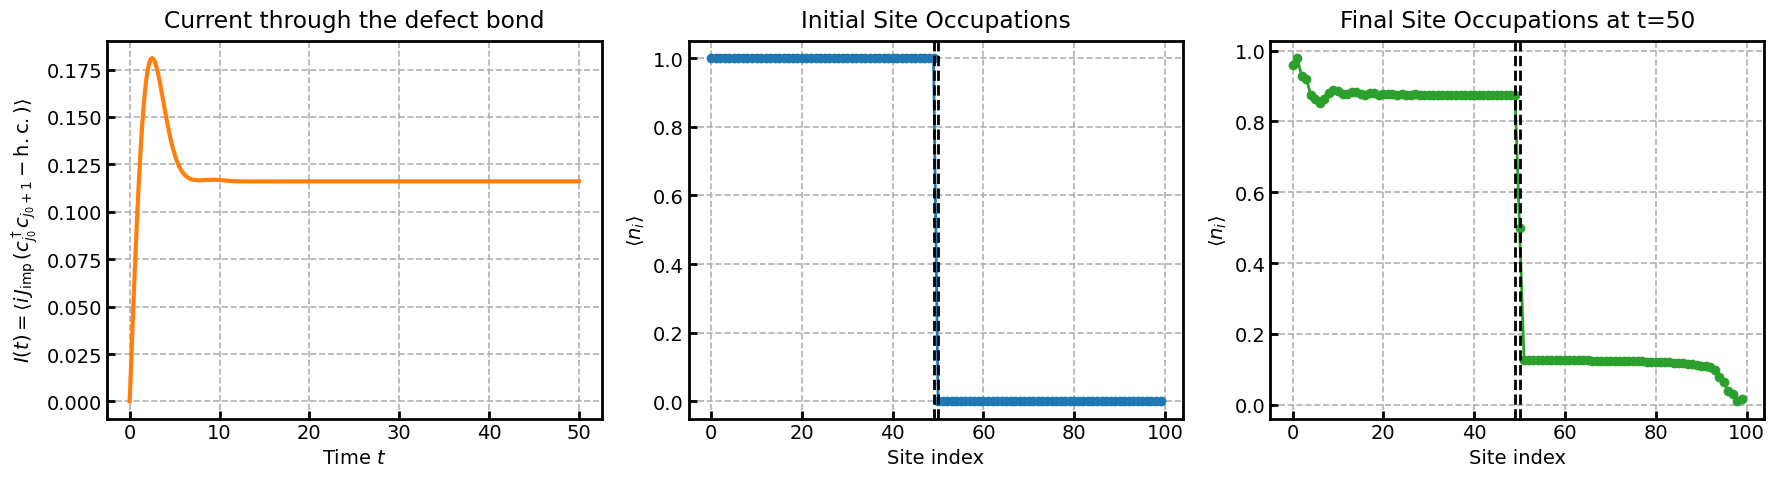

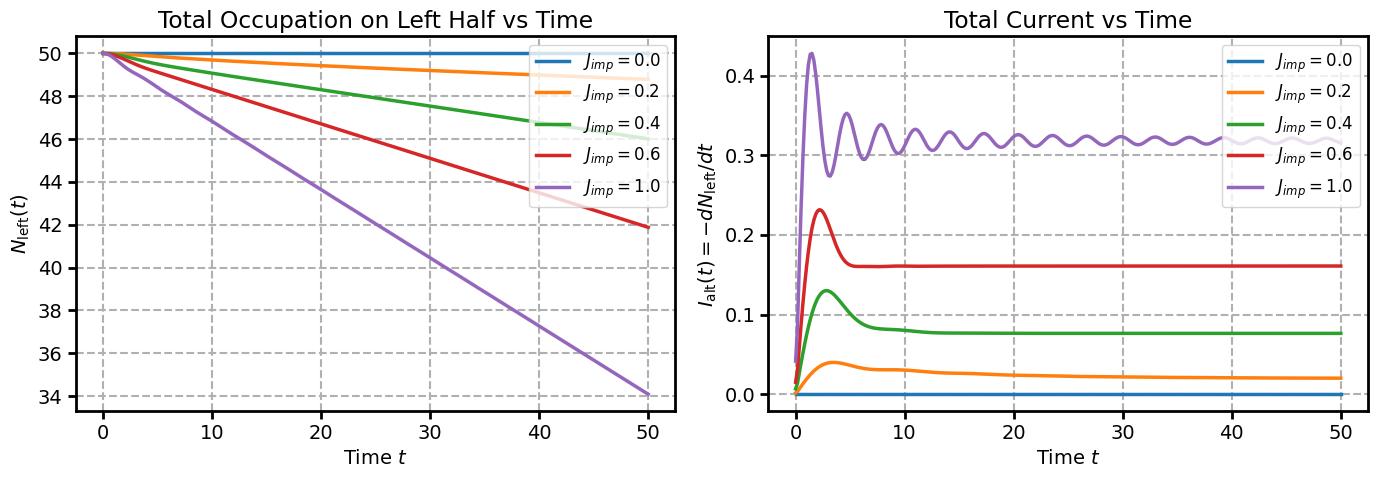

In [10]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Aesthetic settings
plt.rcParams.update({
    'font.size': 14,
    'axes.linewidth': 2,
    'xtick.major.width': 2,
    'ytick.major.width': 2,
    'xtick.major.size': 6,
    'ytick.major.size': 6,
    'grid.linewidth': 1.5,
    'legend.fontsize': 12
})

# Model parameters
L = 100
J = 1.0
mu_L, mu_R = 1.0, -1.0
t_steady = 50.0
j0 = L//2 - 1
center = L//2

# Time grid
times = np.linspace(0, t_steady, 300)

# Array of defect strengths for the alternate‐current study
J_imp_arr = [0.0, 0.2, 0.4, 0.6, 1.0]

# 1) Build & diagonalize hopping Hamiltonian with two defect bonds
def build_hopping_matrix(L, J, J_imp):
    h = np.zeros((L, L), dtype=float)
    for j in range(L-1):
        bond = J_imp if (j == center-1 or j == center) else J
        h[j, j+1] = h[j+1, j] = bond/2
    return h

# 2) Initial correlation matrix (zero‐temperature step‐function occupations)
def initial_correlation_matrix(phi, eps, mu_L, mu_R):
    fL = (eps < mu_L).astype(float)
    fR = (eps < mu_R).astype(float)
    CL = phi @ np.diag(fL) @ phi.conj().T
    CR = phi @ np.diag(fR) @ phi.conj().T
    C0 = np.zeros_like(CL, dtype=complex)
    C0[:j0+1, :j0+1]     = CL[:j0+1, :j0+1]
    C0[j0+1:, j0+1:] = CR[j0+1:, j0+1:]
    return C0

# Prepare figure for correlation‐matrix panels
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Pick a representative defect strength (say J_imp = 0.5) for panel demo
J_imp_demo = 0.5
h = build_hopping_matrix(L, J, J_imp_demo)
eps, phi = la.eigh(h)
C0 = initial_correlation_matrix(phi, eps, mu_L, mu_R)

# Compute steady‐state C
U_steady = phi @ np.diag(np.exp(-1j * eps * t_steady)) @ phi.conj().T
C_steady = U_steady @ C0 @ U_steady.conj().T

# Block 1: 2×2 Re / Im panels
# Real parts
for ax, C, title in zip(axes[0],
                        [C0, C_steady],
                        ['Re[C₀]', f'Re[C(t={t_steady:.0f})]']):
    im = ax.imshow(np.real(C),
                   origin='lower',
                   vmin=0, vmax=1,
                   cmap='viridis',
                   interpolation='nearest')
    ax.set_title(title, pad=12)
    ax.set_xlabel('j')
    ax.set_ylabel('i')
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04,
                 ticks=np.linspace(0,1,6))

# Imag parts
max_im = max(np.abs(np.imag(C0)).max(),
             np.abs(np.imag(C_steady)).max())
for ax, C, title in zip(axes[1],
                        [C0, C_steady],
                        ['Im[C₀]', f'Im[C(t={t_steady:.0f})]']):
    im = ax.imshow(np.imag(C),
                   origin='lower',
                   cmap='RdBu',
                   vmin=-max_im, vmax=max_im,
                   interpolation='nearest')
    ax.set_title(title, pad=12)
    ax.set_xlabel('j')
    ax.set_ylabel('i')
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04,
                 ticks=np.linspace(-max_im, max_im, 9))

for ax in axes.flatten():
    ax.tick_params(direction='in', length=6, width=2)

plt.tight_layout()
plt.show()


# 3) Block 2: Current through defect bond & site occupations
# Use the same J_imp_demo for consistency
h = build_hopping_matrix(L, J, J_imp_demo)
eps, phi = la.eigh(h)
C0 = initial_correlation_matrix(phi, eps, mu_L, mu_R)
U_steady = phi @ np.diag(np.exp(-1j * eps * t_steady)) @ phi.conj().T
C_steady = U_steady @ C0 @ U_steady.conj().T

# Compute j_imp(t)
times = np.linspace(0, t_steady, 300)
currents = []
for t in times:
    U_t = phi @ np.diag(np.exp(-1j * eps * t)) @ phi.conj().T
    Ct = U_t @ C0 @ U_t.conj().T
    currents.append(J_imp_demo * np.imag(Ct[j0, j0+1]))

n_init  = np.real(np.diag(C0))
n_final = np.real(np.diag(C_steady))

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# (a) current through defect bond
axes[0].plot(times, currents, '-', lw=3, color='tab:orange')
axes[0].set_title('Current through the defect bond', pad=10)
axes[0].set_xlabel('Time $t$')
axes[0].set_ylabel(r'$I(t)=\langle i\,J_{\rm imp}\,(c_{j_0}^\dagger c_{j_0+1}-\mathrm{h.c.})\rangle$')
axes[0].grid(True, linestyle='--', linewidth=1.2)

# (b) initial occupations
axes[1].plot(range(L), n_init, 'o-', lw=2,
             markersize=6, color='tab:blue')
axes[1].set_title('Initial Site Occupations', pad=10)
axes[1].set_xlabel('Site index')
axes[1].set_ylabel(r'$\langle n_i\rangle$')
axes[1].axvline(j0,   color='k', linestyle='--', lw=2)
axes[1].axvline(j0+1, color='k', linestyle='--', lw=2)
axes[1].grid(True, linestyle='--', linewidth=1.2)

# (c) final occupations
axes[2].plot(range(L), n_final, 'o-', lw=2,
             markersize=6, color='tab:green')
axes[2].set_title(f'Final Site Occupations at t={t_steady:.0f}', pad=10)
axes[2].set_xlabel('Site index')
axes[2].set_ylabel(r'$\langle n_i\rangle$')
axes[2].axvline(j0,   color='k', linestyle='--', lw=2)
axes[2].axvline(j0+1, color='k', linestyle='--', lw=2)
axes[2].grid(True, linestyle='--', linewidth=1.2)

for ax in axes:
    ax.tick_params(direction='in', length=6, width=2)

plt.tight_layout()
plt.show()


# 4) Block 3: Total occupation & alternate current for various J_imp
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for J_imp in J_imp_arr:
    # diagonalize for each strength
    h = build_hopping_matrix(L, J, J_imp)
    eps, phi = la.eigh(h)
    C0 = initial_correlation_matrix(phi, eps, mu_L, mu_R)

    # compute N_left(t)
    N_left = []
    for t in times:
        U_t = phi @ np.diag(np.exp(-1j * eps * t)) @ phi.conj().T
        Ct = U_t @ C0 @ U_t.conj().T
        N_left.append(np.real(np.trace(Ct[:j0+1, :j0+1])))
    # alternate current
    I_alt = -np.gradient(N_left, times)

    # plot both
    axes[0].plot(times, N_left, lw=2.5, label=f'$J_{{imp}}={J_imp}$')
    axes[1].plot(times, I_alt, lw=2.5, label=f'$J_{{imp}}={J_imp}$')

axes[0].set_title('Total Occupation on Left Half vs Time')
axes[0].set_xlabel('Time $t$')
axes[0].set_ylabel(r'$N_{\rm left}(t)$')
axes[0].grid(True, linestyle='--')

axes[1].set_title('Total Current vs Time')
axes[1].set_xlabel('Time $t$')
axes[1].set_ylabel(r'$I_{\rm alt}(t)=-dN_{\rm left}/dt$')
axes[1].grid(True, linestyle='--')

axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()